# Image Processing - scc0251

# Assignment 2 - Filtering

Author: Maynara Natalia Scoparo <br>
USP number: 11919669 <br>
Course code: 55134 (Mestrado CCMC) <br>
Year: 1		Semester: 1 <br>


In [1]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt

def euclidean_distance(x,y):
     """ Function to perform euclidean distance """
    return math.sqrt(x**2 + y**2)

def gaussian_kernel(x, sigma):
     """Function to perform gaussian kernel"""
    gaussiank = (1 / (2*math.pi* (sigma**2))) * np.exp(-1 * (x**2) / (2 * (sigma**2)))  
    
    return gaussiank

def normalization(I):
     """Function to perform image normalization (0-255)"""
    I_norm = ((I - np.amin(I)) * 255.0) / (np.amax(I) - np.amin(I))
    
    return I_norm

def RSE(output_img, input_img): # Root Square Error
     """Function to compute Root Square Error between input and output images"""
    M,N = input_img.shape # image dimensions
    sumerror = 0
    
    for i in range(M):
        for j in range(N):
            # sum of square errors
            sumerror = sumerror + math.pow(float(output_img[i][j]) - float(input_img[i][j]), 2)

    RSE = math.sqrt(sumerror) # sum root (final result)
    print('Root Square Error: {0:.4f}'.format(RSE)) # print error with 4 decimal places

# Method 1 - Bilateral Filter

In [2]:
def bilateral_filter(input_img, s, r, n):
     """Function to perform bilateral filtering
    Arguments:
        img -- input image
        s -- spacial parameter (gaussian kernel computation parameter)
        r -- range parameter (gaussian kernel computation parameter)
        n -- filter size
    """  
    
    # the filter is n x n, so n=2a+1, a is calculated to
    # index the filter from -a to a (centred at 0,0)
    # besides,"a" defines the image pad width
    a = int((n-1) / 2) 
    
    # padding image with 0s in order to calculate all the pixels of the image
    f = np.pad(input_img, (a,a), 'constant').astype(np.int32) 
    
    # Computing the spacial Gaussin component...
    gs = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            gs[i,j] = gaussian_kernel(euclidean_distance(i-a,j-a),s)
    
    # Computing the range Gaussian component and the new filtered image...
    N,M = f.shape
    g = np.zeros(input_img.shape)
    for x in range(a,N-a):
        for y in range(a,M-a):
            sub_f = f[ x-a : x+a+1 , y-a:y+a+1 ]
            # array with the diferences between the intensity of 
            # the neighbors pixel and the center pixel
            dif_intensity = sub_f - f[x,y] 
            gr = list(map(lambda i: gaussian_kernel(i,r), dif_intensity)) # range Gaussian component
            gr = np.array(gr)
            w = gr * gs # filter
            Wp = np.sum(w) # normalization factor
            If = np.sum(np.multiply(w, sub_f)) / Wp # new value of the centred pixel
            g[x-a,y-a] = If # filtered image array receive the new pixel
    
    g = g.astype(np.uint8)
    
    return g

### Method 3 - Application Examples

Root Square Error: 3429.3613


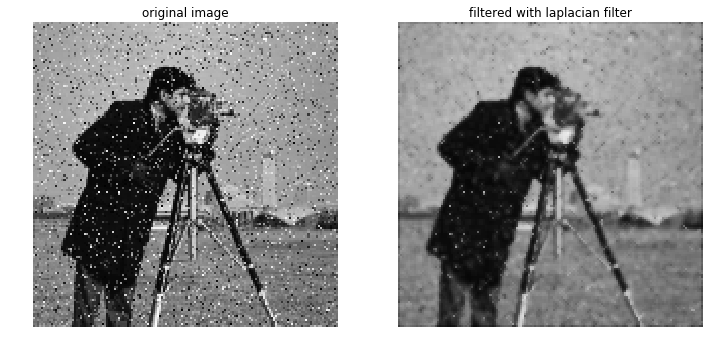

In [3]:
# case 1
filename = "input_and_output_imgs/camera.png"
input_img = imageio.imread(filename)
n = 3
s = 150
r = 100
output_img = bilateral_filter(input_img, s, r, n)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with laplacian filter")
plt.axis('off')

RSE(output_img, input_img)

Root Square Error: 1787.2361


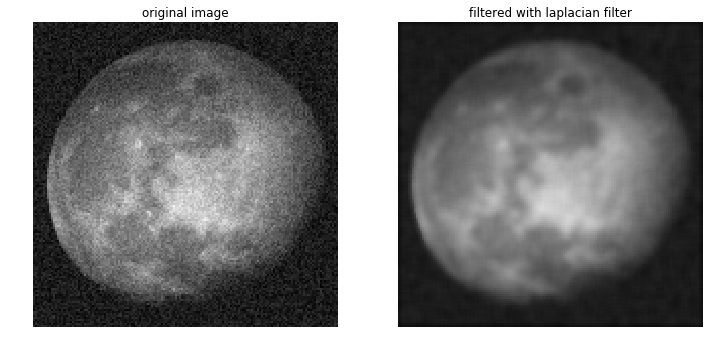

In [4]:
# case 2
filename = "input_and_output_imgs/moon.png"
input_img = imageio.imread(filename)
n = 5
s = 50
r = 100
output_img = bilateral_filter(input_img, s, r, n)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with laplacian filter")
plt.axis('off')

RSE(output_img, input_img)

# Method 2 - Unsharp mask using the Laplacian Filter

In [5]:
def unsharp_mask_laplacian_filter(input_img, c, kernel):
    """Function to perform unsharp mask with Laplacian filter
    Arguments:
        img -- input image
        c -- weigth which multiplies the sharpness mask  (<= 1 attenuates the contribution of the sharpness mask)
        kernel -- type of Laplacian filter (1 or 2)
        
    """  
    
    if kernel == 1:
        k = np.array(([[0,-1,0],[-1,4,-1],[0,-1,0]]))
    if kernel == 2:
        k = np.array(([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
    
    a = 1 # filter is 3 x 3, so n=2a+1 -> 3=2a+1 -> a = 1
   
    # # padding image with 0s
    f = np.pad(input_img, (a,a), 'constant').astype(np.int32)
    
    # Applying the convolution between the image and the laplacian filter
    N,M = f.shape
    g = np.array(f, copy=True)
    g = np.zeros(input_img.shape)
    for x in range(a,N-a):
           for y in range(a,M-a):
                sub_f = f[ x-a : x+a+1 , y-a:y+a+1 ]
                g[x-a,y-a] = np.sum(np.multiply(sub_f, k))
  
    g = normalization(g) # new image in range 0-255
    
    # Adding the original image to the edges obtained 
    # by convolving with laplacian filter
    g = (g * c) + input_img 
    
    g = normalization(g) # new image scaled in range 0-255
    
    return g

### Method 2 - Application Examples

Root Square Error: 2519.4489


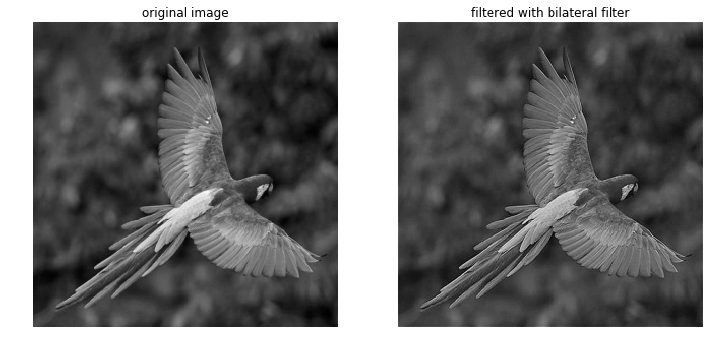

In [6]:
#case 3
filename = "input_and_output_imgs/arara.png"
input_img = imageio.imread(filename)
c = 0.5
kernel = 1
output_img = unsharp_mask_laplacian_filter(input_img, c, kernel)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with bilateral filter")
plt.axis('off')

RSE(output_img, input_img)

Root Square Error: 3664.3680


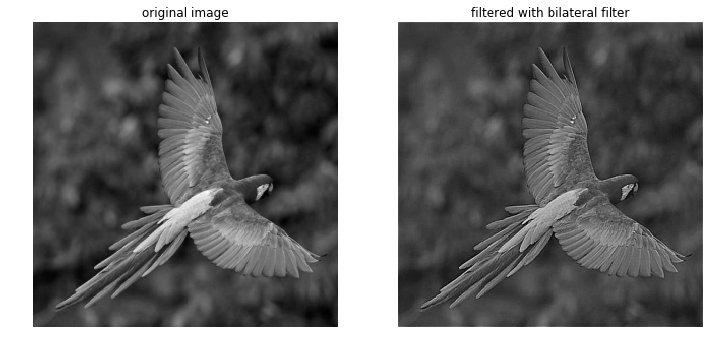

In [7]:
# case 4
filename = "input_and_output_imgs/arara.png"
input_img = imageio.imread(filename)
c = 0.75
kernel = 2
output_img = unsharp_mask_laplacian_filter(input_img, c, kernel)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with bilateral filter")
plt.axis('off')

RSE(output_img, input_img)

# Method 3 - Vignette Filter

In [8]:
def vignette_filter(input_img, row, col): 
    """Function to perform unsharp mask with Laplacian filter
    Arguments:
        img -- input image
        row -- sigma r (gaussian kernel computation parameter)
        col -- sigma c (gaussian kernel computation parameter)
        
    """  
    
    N,M = input_img.shape
    a = int((N-1) / 2) # index the filter row from -a to a (centred at 0,0)
    b = int((M-1) / 2) # index the filter column from -b to b (centred at 0,0)
   
    Wr = list()
    Wc = list()
    
    for i in range(N):
        Wr.append(gaussian_kernel(i-a, row))
    
    for i in range(M):
        Wc.append(gaussian_kernel(i-b, col))
    
    Wr = np.array([Wr])
    Wc = np.array([Wc])
    
    w = Wc * Wr.T # matrix product
    
    g = w * input_img # original image multiplied, element by element, by w
    g = normalization(g) # new image scaled in range 0-255
    
    return g

### Method 3 - Application Examples

Root Square Error: 16972.4239


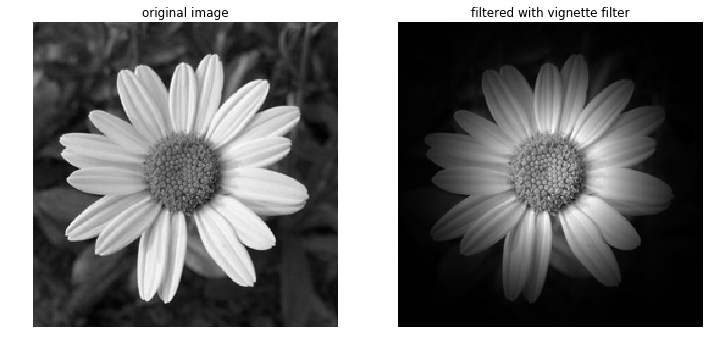

In [9]:
# case 5
filename = "input_and_output_imgs/flower.png"
input_img = imageio.imread(filename)
row = 50
col = 50
output_img = vignette_filter(input_img, row, col)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with vignette filter")
plt.axis('off')

RSE(output_img, input_img)

Root Square Error: 20391.1069


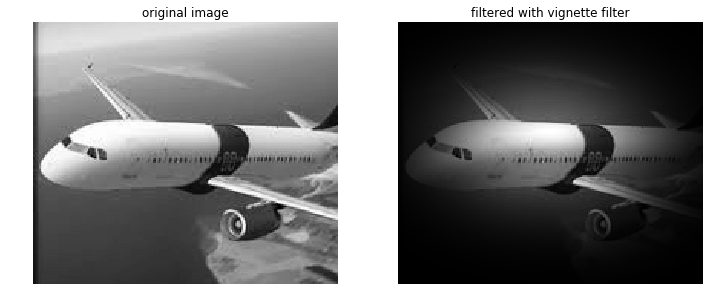

In [10]:
# case 6
filename = "input_and_output_imgs/airplane.png"
input_img = imageio.imread(filename)
row = 30
col = 45
output_img = vignette_filter(input_img, row, col)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(input_img, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with vignette filter")
plt.axis('off')

RSE(output_img, input_img)